In [4]:
import numpy as np

In [5]:
import holoviews as hv

In [7]:
hv.notebook_extension()
%opts Layout [fig_size=125] Points [size_index=None] (s=50) Scatter3D [size_index=None]
%opts Bounds (linewidth=2 color='k') {+axiswise} Text (fontsize=16 color='k') Image (cmap='Reds')

:Layout
   .Image.I  :Image   [x,y]   (z)
   .Image.II :Image   [x,y]   (z)
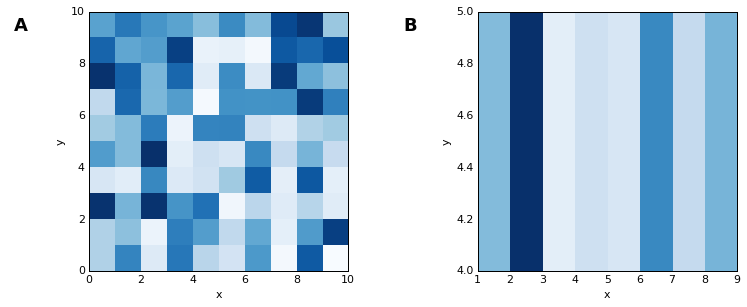

In [12]:
%opts Image (cmap='Blues') Bounds (color='red')
np.random.seed(0)
extents = (0, 0, 10, 10)
img = hv.Image(np.random.rand(10, 10), bounds=extents)
img_slice = img[1:9,4:5]
#box = hv.Bounds((1,4,9,5))
#img*box + img_slice
img + img_slice

:Layout
   .Image.I   :Image   [x,y]   (z)
   .Overlay.I :Overlay
      .Image.I   :Image   [x,y]   (z)
      .Points.I  :Points   [x,y]   (z)
      .Points.II :Points   [x,y]
   .Table.I   :Table   [x,y]   (z)
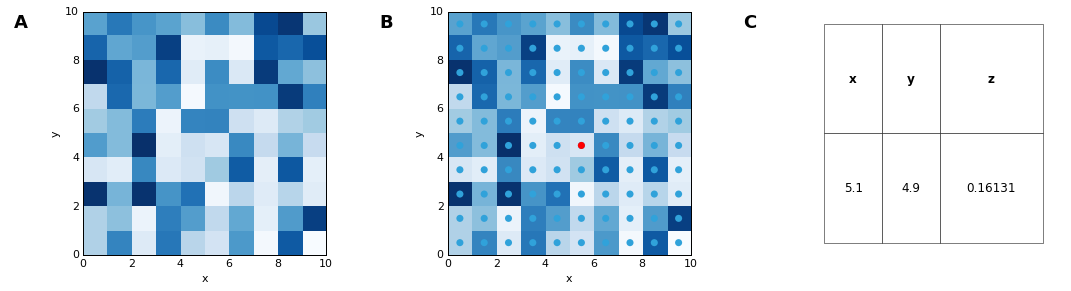

In [22]:
img_coords = hv.Points(img.table(), extents=extents)
labeled_img = img * img_coords * hv.Points([img.closest([(5.1,4.9)])])(style=dict(color='r'))
#img + labeled_img + img.sample([(5.1,4.9)])
img + labeled_img + img.sample([(5.1,4.9)])



In [29]:
img[5.1, 4.0001]

0.16130951788499626

/Users/fangohr/anaconda/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['DejaVu Sans'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


b':Table   [x,y]   (z)'
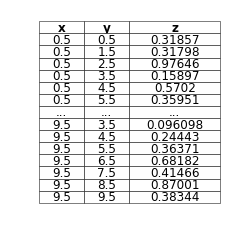

In [14]:
img.table()

b':Image   [x,y]   (z)'
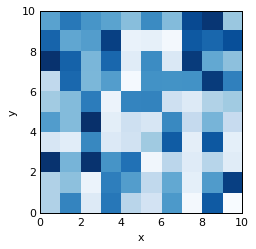

In [15]:
img

/Users/fangohr/anaconda/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['DejaVu Sans'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


:Layout
   .Overlay.I :Overlay
      .Scatter3D.I  :Scatter3D   [Observation,x,y]   (z)
      .Scatter3D.II :Scatter3D   [Observation,x,y]   (z)
   .Table.I   :Table   [Observation,x,y]   (z)
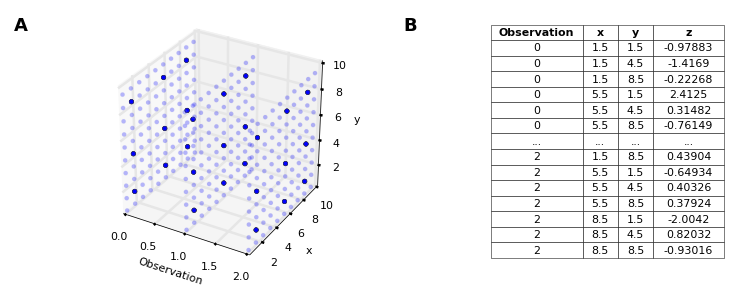

In [32]:
obs_hmap = hv.HoloMap({i: hv.Image(np.random.randn(10, 10), bounds=extents)
                       for i in range(3)}, key_dimensions=['Observation'])
#HoloMaps also provide additional functionality to perform regular sampling on your data. In this case we'll take 3x3 subsamples of each of the Images.

sample_style = dict(edgecolors='k', alpha=1)
all_samples = obs_hmap.table().to.scatter3d()(style=dict(alpha=0.15))
sampled = obs_hmap.sample((3,3))
subsamples = sampled.to.scatter3d()(style=sample_style)
all_samples * subsamples + sampled

In [ ]:
obs_h